# Basis functions and standard nodes for major approximation schemes

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demapp03.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Oct-22</i>
<hr>


## Initial tasks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon import BasisChebyshev, BasisSpline

FIGSIZE = [9,6]

### Set degree of approximation and approximation interval


In [2]:
n, a, b = 12, -1, 1

###  Routine for plotting basis functions

In [3]:
def basisplot(x,Phi,figtitle, titles):
    fig, axs = plt.subplots(3, 4, figsize=FIGSIZE, sharex=True,sharey=True)
    ymin = np.round(Phi.min())
    ymax = np.round(Phi.max())
    degree = 0
    for phi, ax, ttl in zip(Phi, axs.flatten(), titles):        
        ax.plot(x, phi, lw=4)
        ax.set_title(ttl, size=14)
        ax.set_xticklabels([a, b], fontsize=11)
        ax.set_yticklabels([ymin, ymax], fontsize=11)
        degree += 1
    ax.set(ylim=[ymin,ymax], xlim=[a,b],xticks=[a, b], yticks=[ymin, ymax])
    fig.suptitle(figtitle, size=16)    
    return fig

### Construct plotting grid

In [4]:
m = 1001
x = np.linspace(a, b, m)

### Plot monomial basis functions

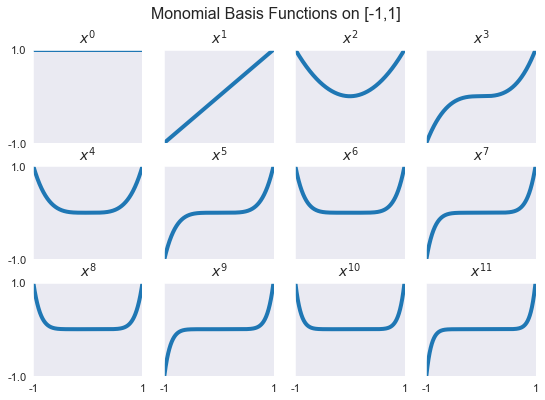

In [5]:
Phi = np.array([x ** j for j in np.arange(n)])
figm = basisplot(x,Phi,'Monomial Basis Functions on [-1,1]',['$x^{%d}$' % d for d in range(12)])

### Plot Chebychev basis functions and nodes

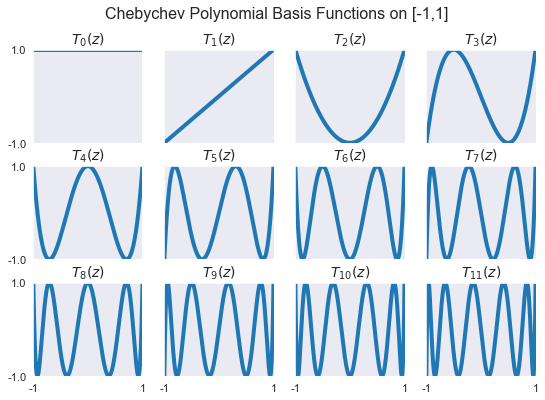

In [6]:
B = BasisChebyshev(n,a,b)
figch = basisplot(x, B.Phi(x).T,'Chebychev Polynomial Basis Functions on [-1,1]',['$T_{%d}(z)$' % d for d in range(12)])

### Plot linear spline basis functions and nodes

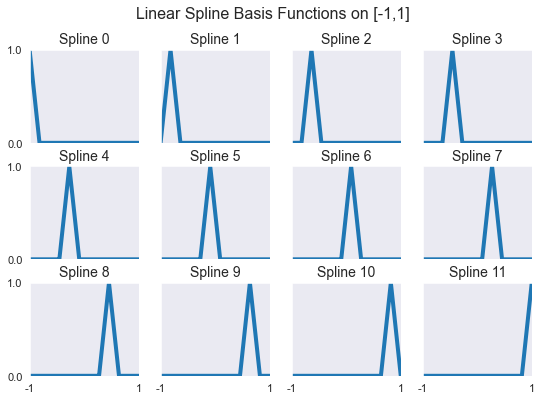

In [7]:
L = BasisSpline(n,a,b,k=1)
figl = basisplot(x, L.Phi(x).T.toarray(),'Linear Spline Basis Functions on [-1,1]', [f'Spline {d}' for d in range(12)])

### Plot cubic spline basis functions and nodes

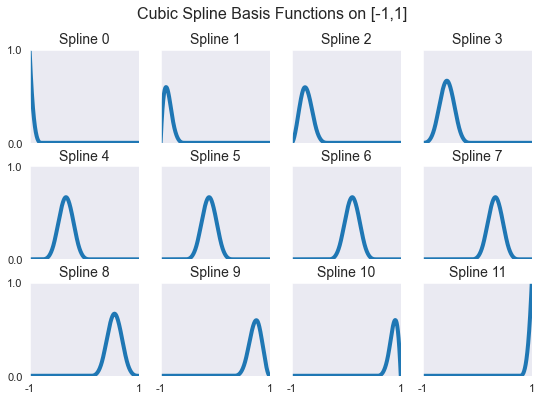

In [8]:
C = BasisSpline(n,a,b,k=3)
figc = basisplot(x, C.Phi(x).T.toarray(),'Cubic Spline Basis Functions on [-1,1]',[f'Spline {d}' for d in range(12)])

###  Routine for plotting approximation nodes

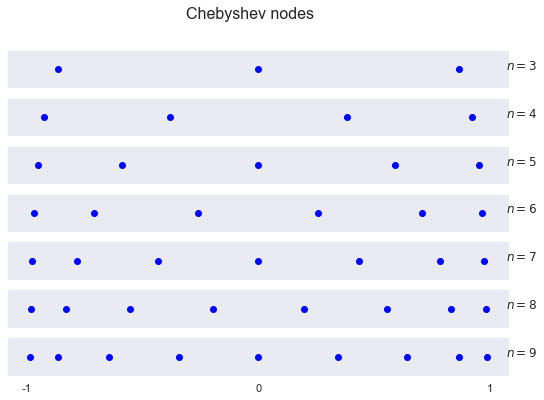

In [9]:
fignodos, axs = plt.subplots(7,1,figsize=FIGSIZE, sharex=True, sharey=True)
for i, ax in enumerate(axs.flatten()):
    n = i+3
    B = BasisChebyshev(n,a,b)
    ax.plot(B.nodes, 0, 'bo')
    ax.set_xticks([a,0,b])
    ax.set_xticklabels([a,0,b], fontsize=11)
    ax.set_yticks([])
    ax.text(1.07, 0, f'$n={n}$', size=12)
    fignodos.suptitle('Chebyshev nodes', size=16) 

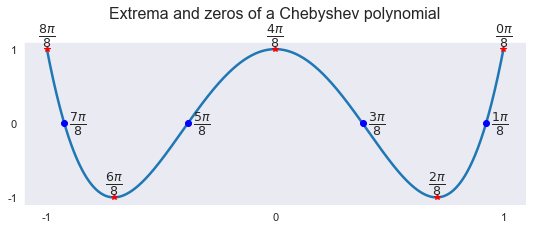

In [10]:
fig0x, ax = plt.subplots(figsize=[9,3])
B = BasisChebyshev(5,a,b)
ax.plot(x, B.Phi(x)[:,-1])
xextr=np.cos(np.arange(5)*np.pi/4)
ax.plot(xextr, B.Phi(xextr)[:,-1],'r*')
for i, vv in enumerate(xextr):
    ax.text(vv,B.Phi(vv)[:,-1],r'$\frac{%d \pi}{8}$' % (2*i), ha='center', va='bottom')  

xcero = np.cos((np.arange(4)+0.5)*np.pi/4)
ax.plot(xcero, B.Phi(xcero)[:,-1],'bo')

for i, vv in enumerate(xcero):
    ax.text(vv,0,r' $\frac{%d \pi}{8}$' % (2*i+1), ha='left', va='center') 

ax.set_xticks([-1,0,1])
ax.set_xticklabels([-1,0,1],fontsize=11)
ax.set_yticks([-1,0,1])
ax.set_yticklabels([-1,0,1],fontsize=11)
ax.set_title('Extrema and zeros of a Chebyshev polynomial\n', size=16);